In [ ]:
# EDA_and_Preprocessing


In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [110]:
df = pd.read_csv('Employee.csv')

In [ ]:
#1. Data Exploration

In [116]:
# explore data
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

| Company   | Age   | Salary   | Place    | Country   | Gender   |
|:----------|:------|:---------|:---------|:----------|:---------|
| TCS       | 20    | nan      | Chennai  | India     | 0        |
| Infosys   | 30    | nan      | Mumbai   | India     | 0        |
| TCS       | 35    | 2300     | Calcutta | India     | 0        |
| Infosys   | 40    | 3000     | Delhi    | India     | 0        |
| TCS       | 23    | 4000     | Mumbai   | India     | 0        |


In [124]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB
None


In [128]:
# Unique values and their lengths
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Column '{col}': {len(unique_values)} unique values - {unique_values}")

Column 'Company': 7 unique values - ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Column 'Age': 30 unique values - [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Column 'Salary': 41 unique values - [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Column 'Place': 12 unique values - ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Column 'Country': 1 unique values - ['India']
Column 'Gender': 2 unique values - [0 1]


In [134]:
# statistical analysis 
print(df.describe())

              Age       Salary      Gender
count  130.000000   124.000000  148.000000
mean    30.484615  5312.467742    0.222973
std     11.096640  2573.764683    0.417654
min      0.000000  1089.000000    0.000000
25%     22.000000  3030.000000    0.000000
50%     32.500000  5000.000000    0.000000
75%     37.750000  8000.000000    0.000000
max     54.000000  9876.000000    1.000000


In [138]:
# Renaming columns
df=df.rename(columns={'Company':'Company Name','Place':'City'})

In [142]:
df
df1=df.copy()

# 2:Data cleaning

In [150]:
# missing values
print(df1.isnull().sum())
df1['Age'] = df1['Age'].replace(0, np.nan)

Company Name     8
Age             24
Salary          24
City            14
Country          0
Gender           0
dtype: int64


In [166]:
# missing values in Company columns replace using mode()
df1['Company Name']=df1['Company Name'].mode()[0]

In [162]:
# missing values in age column replace using mean of age
mean_age = df1['Age'].mean()  
df1['Age'] = df1['Age'].fillna(mean_age)

In [164]:
# missing values in Salary column using median()
median_salary=df1['Salary'].median()
df1['Salary']=df1['Salary'].fillna(median_salary)

In [168]:
# missing values in City column replace using mode()
df1['City']=df1['City'].mode()[0]

In [170]:
print(df1.isnull().sum())

Company Name    0
Age             0
Salary          0
City            0
Country         0
Gender          0
dtype: int64


In [192]:
# Inappropriate values:
print(df1[df1['Salary'] < 0])

Empty DataFrame
Columns: [Company Name, Age, Salary, City, Country, Gender]
Index: []


In [194]:
# Duplicate rows:
df1 = df1.drop_duplicates()

In [200]:
# outliers and its removal
# using IQR for a numerical column 'salary'
Q1 = df1['Salary'].quantile(0.25)
Q3 = df1['Salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 0.5 * IQR
upper_bound = Q3 + 0.5 * IQR
df1_iqr= df1[(df1['Salary'] >= lower_bound) & (df1['Salary'] <= upper_bound)]


In [202]:
df1_iqr

,Company Name,Age,Salary,City,Country,Gender
0,TCS,20.0,5000.0,Mumbai,India,0
1,TCS,30.0,5000.0,Mumbai,India,0
2,TCS,35.0,2300.0,Mumbai,India,0
3,TCS,40.0,3000.0,Mumbai,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
138,TCS,44.0,3033.0,Mumbai,India,0
142,TCS,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Mumbai,India,1
145,TCS,44.0,4034.0,Mumbai,India,1


In [ ]:
# 3:Data Analysis:

In [180]:
# Filter data:
filtered_df1 = df1[(df1['Age'] > 40) & (df1['Salary'] < 5000)]

In [182]:
filtered_df1

,Company Name,Age,Salary,City,Country,Gender
21,TCS,50.0,3184.0,Mumbai,India,0
32,TCS,45.0,4034.0,Mumbai,India,0
39,TCS,41.0,3000.0,Mumbai,India,0
50,TCS,41.0,3000.0,Mumbai,India,0
57,TCS,51.0,3184.0,Mumbai,India,0
68,TCS,43.0,4034.0,Mumbai,India,0
75,TCS,44.0,3000.0,Mumbai,India,0
86,TCS,41.0,3000.0,Mumbai,India,0
93,TCS,54.0,3184.0,Mumbai,India,0
104,TCS,44.0,4034.0,Mumbai,India,0


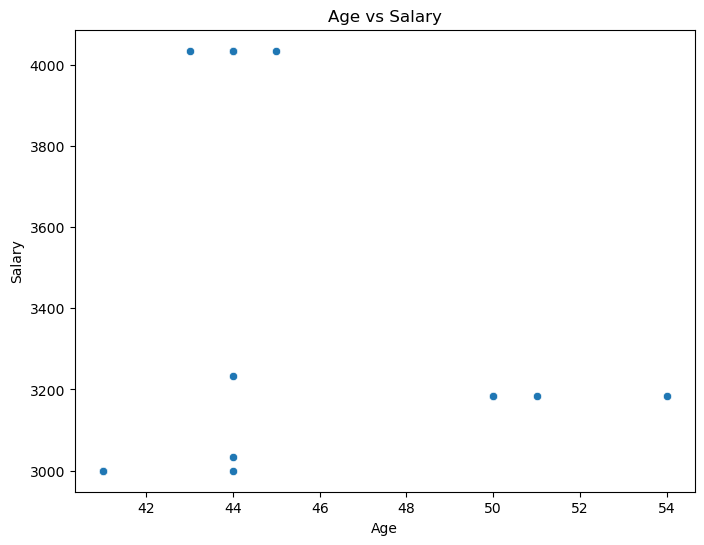

In [184]:
# Scatter Plot
plt.figure(figsize=(8,6))
snc.scatterplot(x="Age",y="Salary",data=filtered_df1)
plt.title('Age vs Salary')
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

In [190]:
# Count people from each place:
place_counts = df1['City'].value_counts()
print(place_counts)

City
Mumbai    148
Name: count, dtype: int64


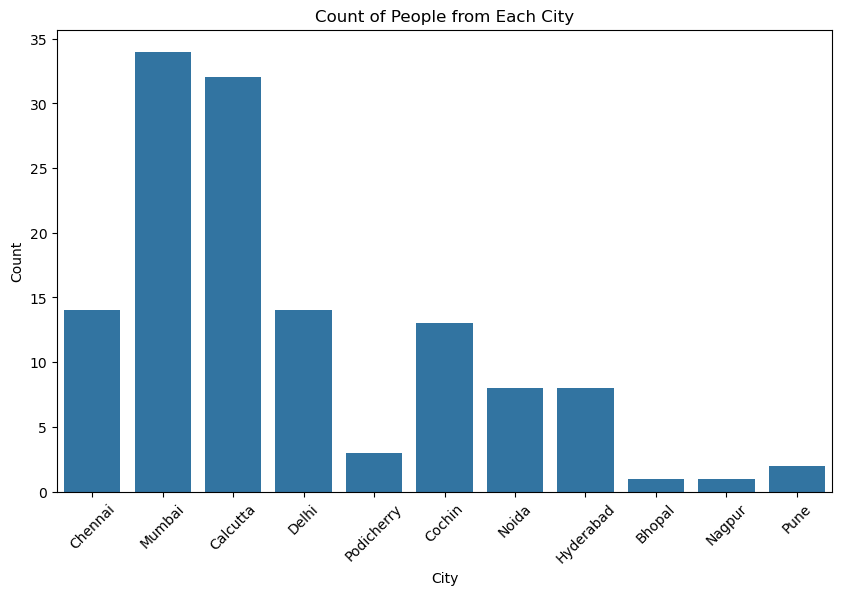

In [210]:
# Visualize place counts
plt.figure(figsize=(10, 6))
sns.countplot(x='City', data=df)
plt.title('Count of People from Each City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

In [ ]:
# 4:Data Encoding

In [212]:
# One-hot encoding:
df1 = pd.get_dummies(df1, columns=['Gender', 'City'])

In [218]:
# Label encoding:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df1['Gender_LabelEncoded'] = label_encoder.fit_transform(df1['Gender_1'])

In [227]:
df1['Gender_LabelEncoded']

0      0
1      0
2      0
3      0
4      0
      ..
138    0
142    0
143    1
145    1
146    1
Name: Gender_LabelEncoded, Length: 116, dtype: int64

In [ ]:
# 5 Feature Scaling:

In [221]:
# StandardScaler:
scaler = StandardScaler()
df1[['Age', 'Salary']] = scaler.fit_transform(df1[['Age', 'Salary']])

In [223]:
# MinMaxScaler:
scaler = MinMaxScaler()
df1[['Age_MinMaxScaled', 'Salary_MinMaxScaled']] = scaler.fit_transform(df1[['Age', 'Salary']])

In [225]:
df1[['Age_MinMaxScaled', 'Salary_MinMaxScaled']] 

,Age_MinMaxScaled,Salary_MinMaxScaled
0,0.081081,0.445089
1,0.351351,0.445089
2,0.486486,0.137817
3,0.621622,0.217480
4,0.162162,0.331285
...,...,...
138,0.729730,0.221236
142,0.135135,0.809491
143,0.432432,0.903039
145,0.729730,0.335154


In [229]:
df1

,Company Name,Age,Salary,Country,Gender_0,Gender_1,City_Mumbai,Gender_LabelEncoded,Age_MinMaxScaled,Salary_MinMaxScaled
0,TCS,-1.406110,-0.144091,India,True,False,True,0,0.081081,0.445089
1,TCS,-0.221927,-0.144091,India,True,False,True,0,0.351351,0.445089
2,TCS,0.370164,-1.219853,India,True,False,True,0,0.486486,0.137817
3,TCS,0.962256,-0.940952,India,True,False,True,0,0.621622,0.217480
4,TCS,-1.050855,-0.542521,India,True,False,True,0,0.162162,0.331285
...,...,...,...,...,...,...,...,...,...,...
138,TCS,1.435929,-0.927804,India,True,False,True,0,0.729730,0.221236
142,TCS,-1.169274,1.131683,India,True,False,True,0,0.135135,0.809491
143,TCS,0.133328,1.459193,India,False,True,True,1,0.432432,0.903039
145,TCS,1.435929,-0.528975,India,False,True,True,1,0.729730,0.335154
